In [1]:
# importaint libraries
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy
import pandas as pd

# mesh files to be imported
msh_dict = {}
msh_dict[1] =  amfe.amfe_dir('meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh')
msh_dict[2] = amfe.amfe_dir('meshes/test_meshes/ring_connection.msh')
msh_dict[3] = amfe.amfe_dir('meshes/test_meshes/ring_free.msh')

# id of physical domain
domain_id = {}
domain_id[1] = 3
domain_id[2] = 6
domain_id[3] = 6

# importing mesh 1
m1 = amfe.Mesh()
m1.import_msh(msh_dict[1])

# importing mesh 2
m2 = amfe.Mesh()
m2.import_msh(msh_dict[2])

# importing mesh 3
m3 = amfe.Mesh()
m3.import_msh(msh_dict[3])

m4 = m3.rot_z(-86.55)

# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

# append domains to MechanicalAssembly
my_system = amfe.MechanicalAssembly()

submesh1 = m1.set_domain('phys_group',domain_id[1])
submesh2 = m2.set_domain('phys_group',domain_id[2])
submesh3 = m3.set_domain('phys_group',domain_id[3])
submesh4 = m4.set_domain('phys_group',domain_id[3])

my_system.append_domain(submesh1, my_material, 1)
my_system.append_domain(submesh2, my_material, 2)
my_system.append_domain(submesh3, my_material, 3)
my_system.append_domain(submesh4, my_material, 4)
my_system.update_global_system()

# replacing phys tags to avoid conflict
my_system.change_domain_physical_tag(1,2,8)
my_system.change_domain_physical_tag(1,1,9)
my_system.change_domain_physical_tag(1,3,6)
my_system.change_domain_physical_tag(1,3,6)
my_system.update_global_system()

# select submesh for interfaces
sub_int1 = my_system.get_submesh(2,3)
sub_int2 = my_system.get_submesh(3,4)
my_system.add_bonded_interface_constraint(sub_int1,sub_int2)

sub_int3 = my_system.get_submesh(1,9)
sub_int4 = my_system.get_submesh(2,2)
my_system.add_bonded_interface_constraint(sub_int3,sub_int4)

sub_int5 = my_system.get_submesh(2,4)
sub_int6 = my_system.get_submesh(4,3)
my_system.add_bonded_interface_constraint(sub_int5,sub_int6,tol=5.0e-4)


# replacing phys tags to avoid conflict
my_system.change_domain_physical_tag(3,3,10)
my_system.change_domain_physical_tag(3,4,7)
my_system.change_domain_physical_tag(4,3,7)
my_system.change_domain_physical_tag(4,4,11)
my_system.update_global_system()    

# mesh of one turbine section
new_mesh = my_system.get_global_mesh()



Python was not able to load the fast fortran material routines.


*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh successfully imported. 
Assign a material to a physical group.
*************************************************************

*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/ring_connection.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/ring_connection.msh successfully imported. 
Assign a material to a physical group.
*************************************************************

*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/ring_free.msh
Mesh H:\TUM-PC\Dokumente\Pr

No handles with labels found to put in legend.


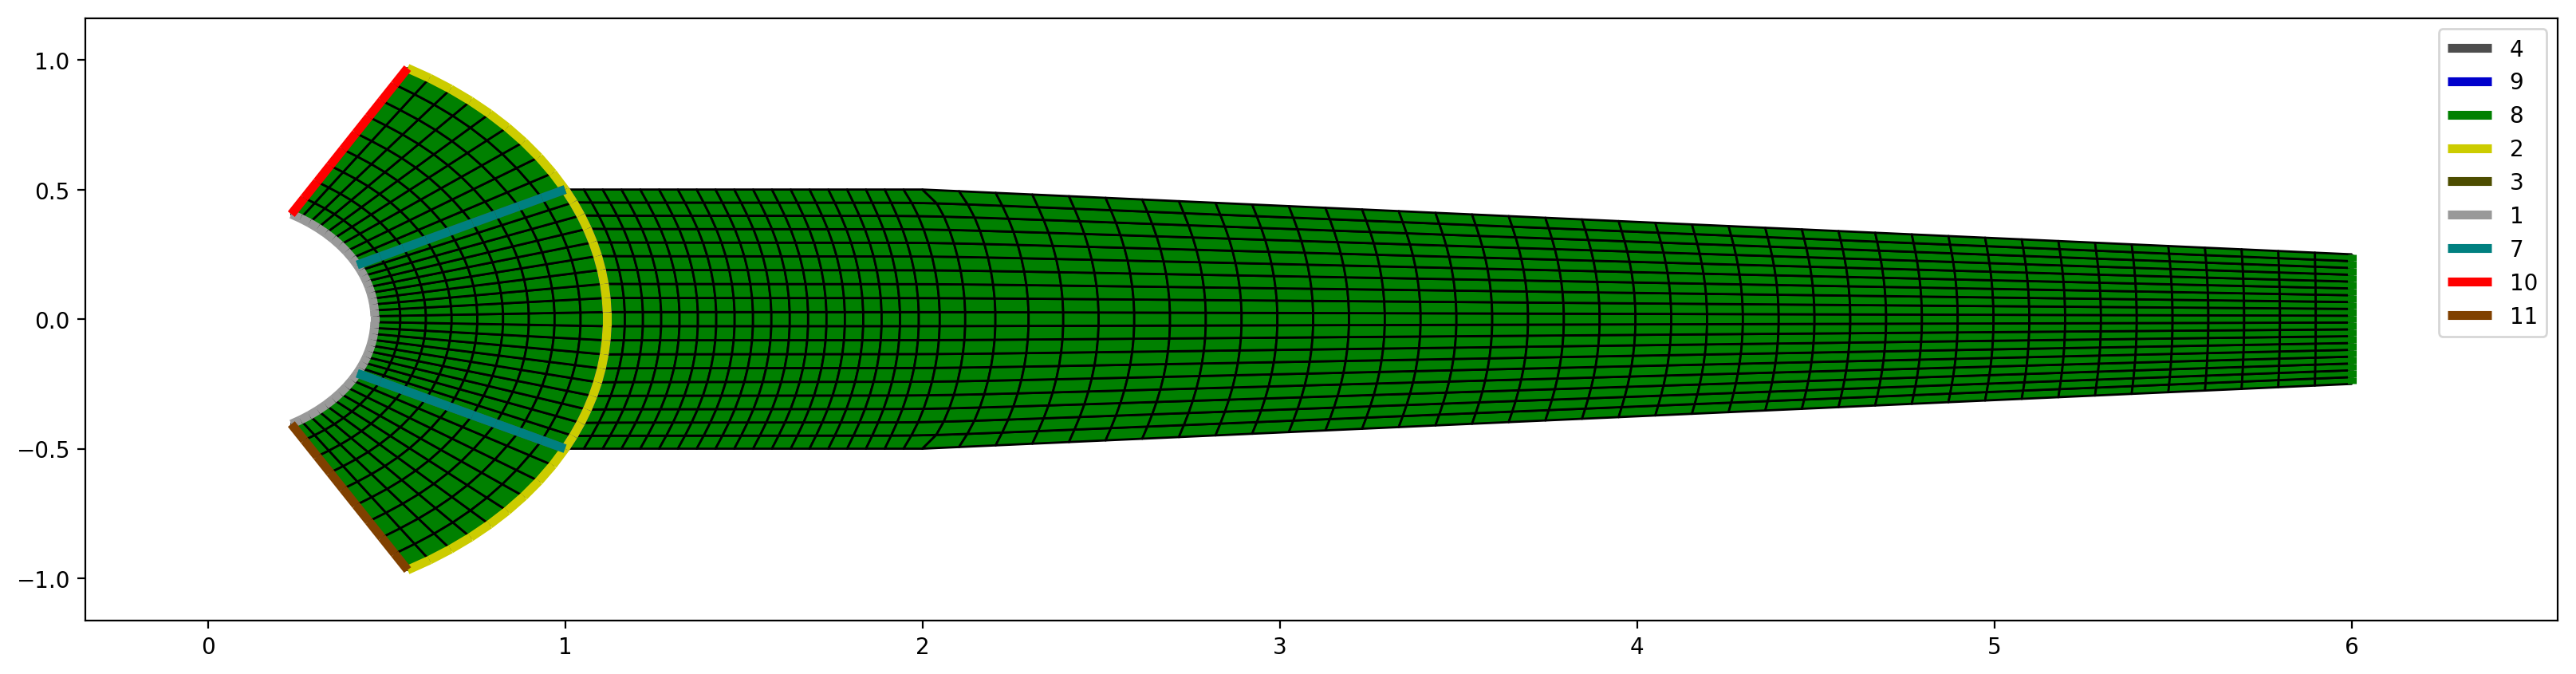

In [2]:
fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 200, facecolor='w', edgecolor='k')
amfe.plot_mesh(new_mesh,ax1)
plt.show()

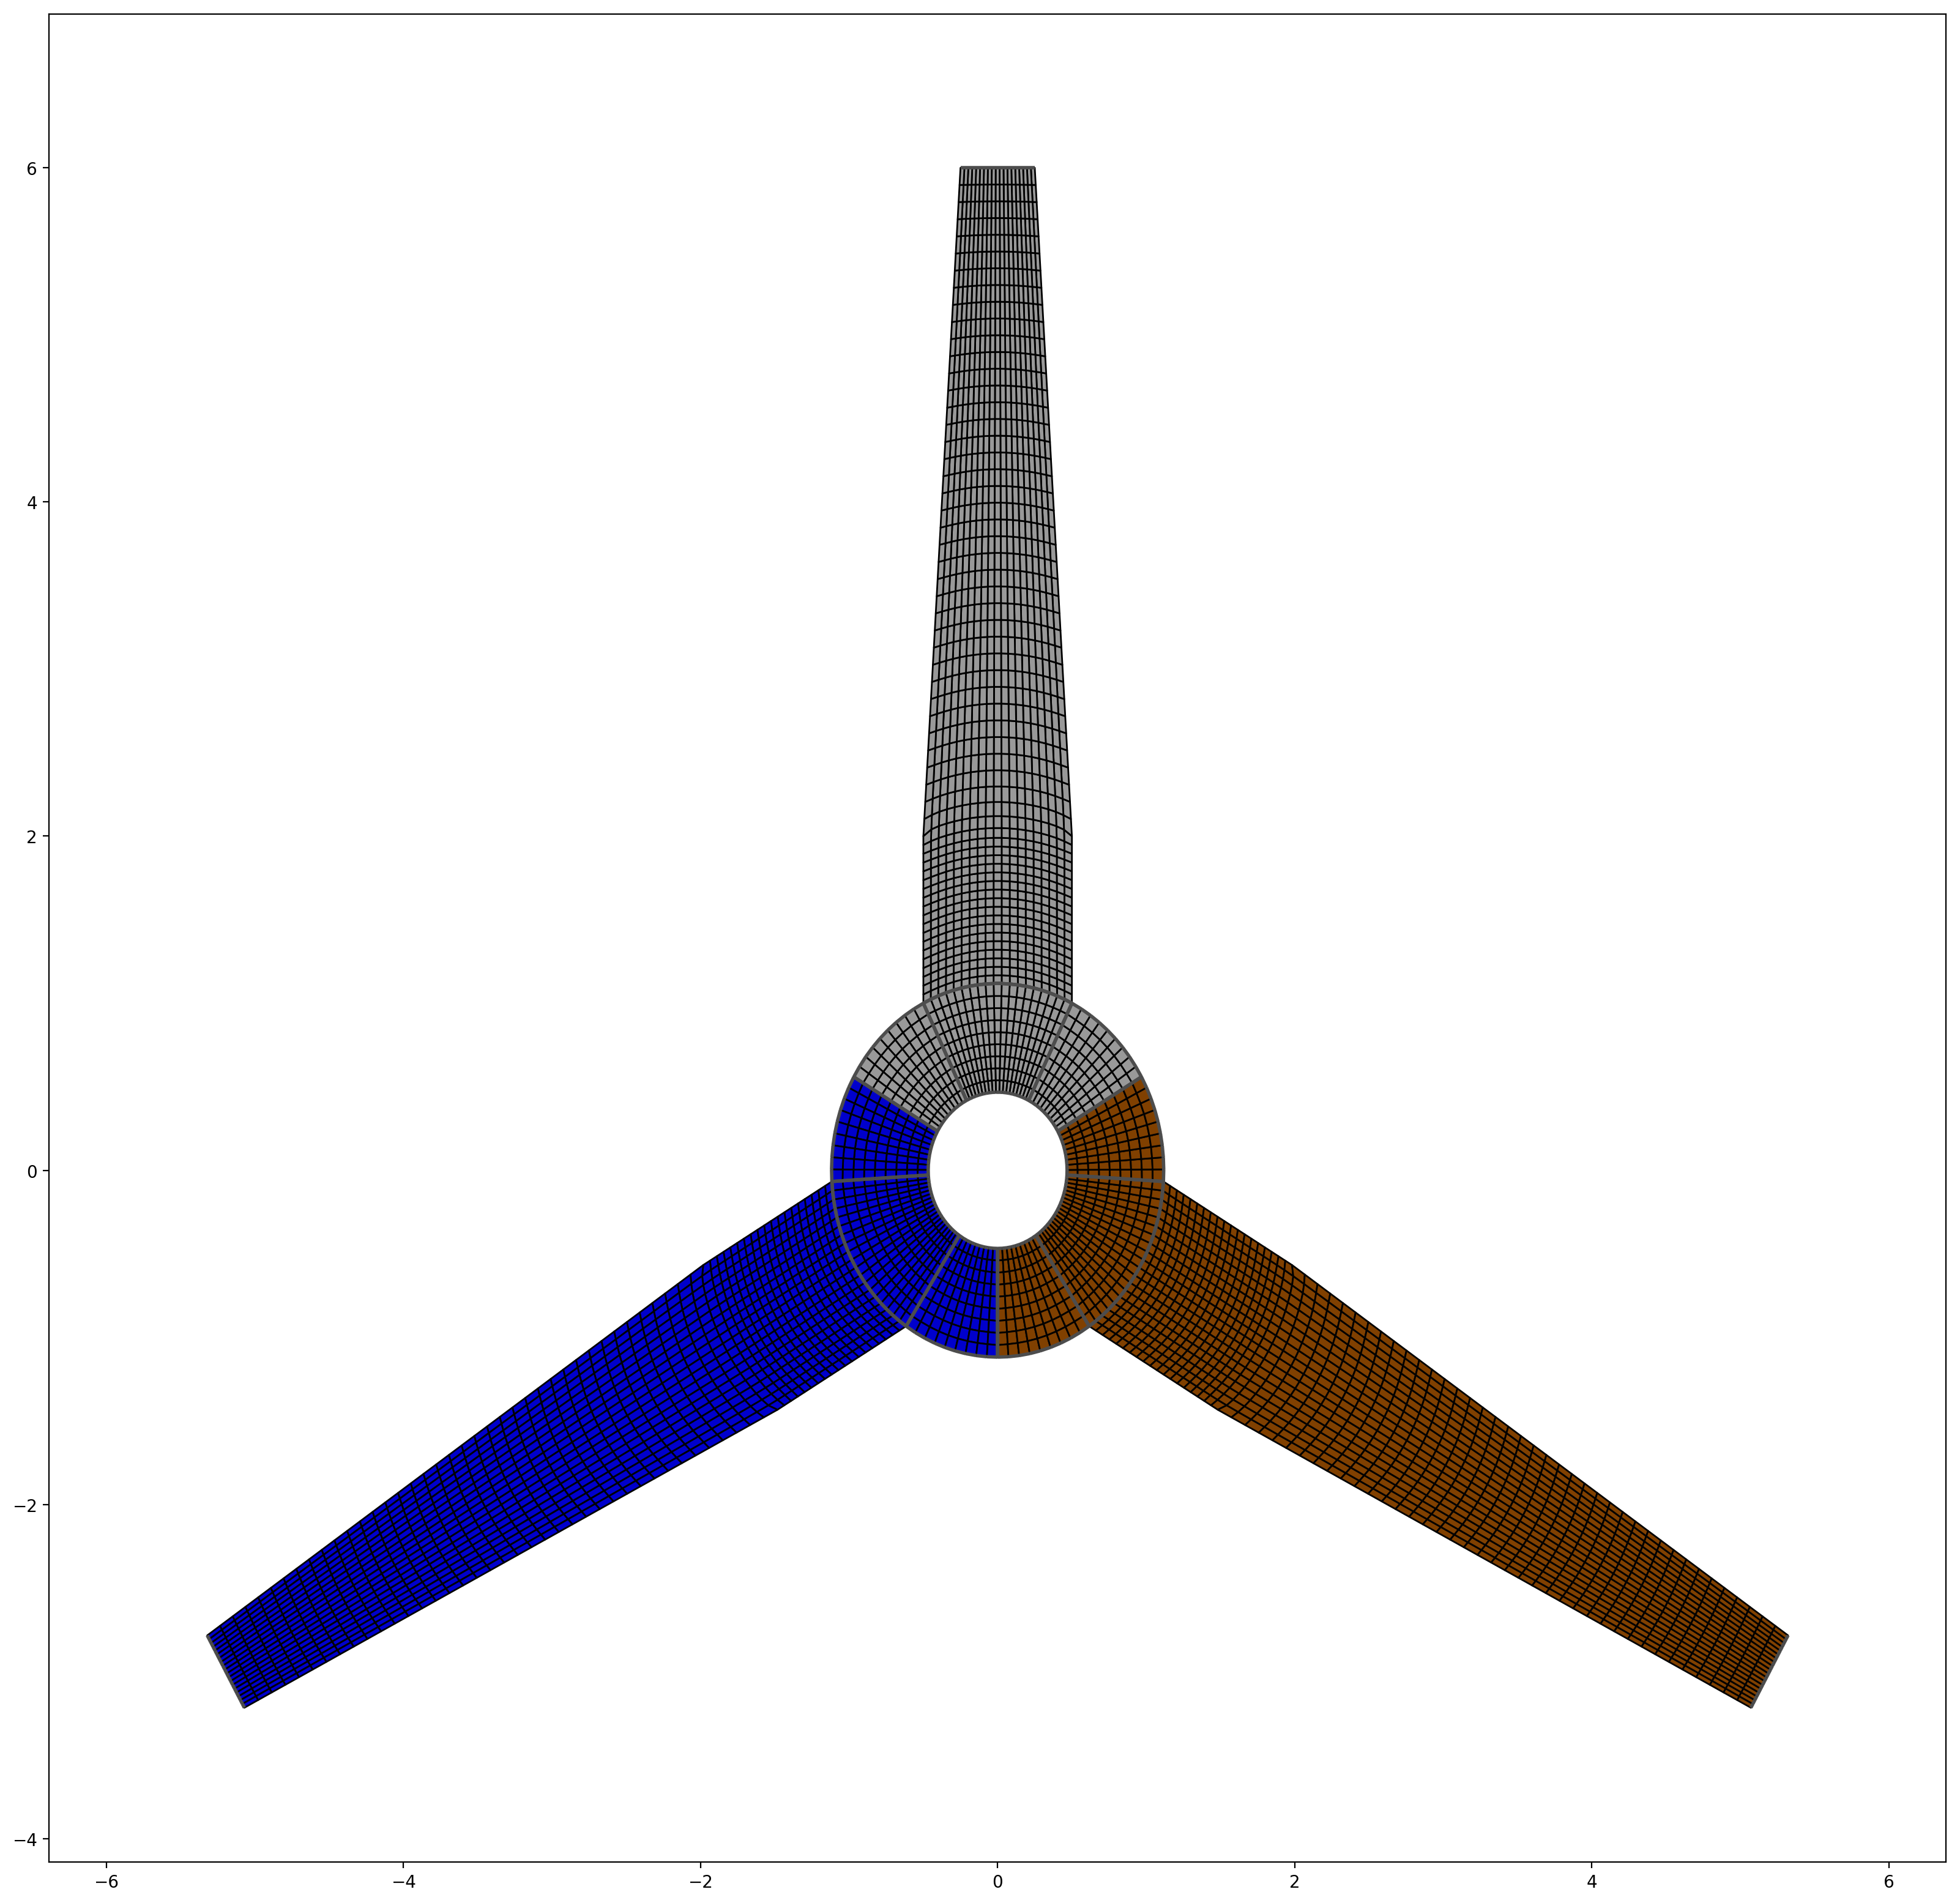

In [3]:
global_system = amfe.MechanicalAssembly()
mesh_list = []
submesh_list = []
angle_list = [90,210,330]
global_domain_id = 6

fig, ax1=plt.subplots(1,figsize=(20, 20), dpi= 200, facecolor='w', edgecolor='k')
for i, angle in enumerate(angle_list):
    new_mesh_i = new_mesh.rot_z(angle)
    submesh_i = new_mesh_i.set_domain('phys_group', global_domain_id)
    mesh_list.append(new_mesh_i)
    submesh_list.append(submesh_i)
    amfe.plot_mesh(new_mesh_i,ax1,False)
    global_system.append_domain(submesh_i, my_material, i+1)
    
plt.show()
global_system.update_global_system()

No handles with labels found to put in legend.


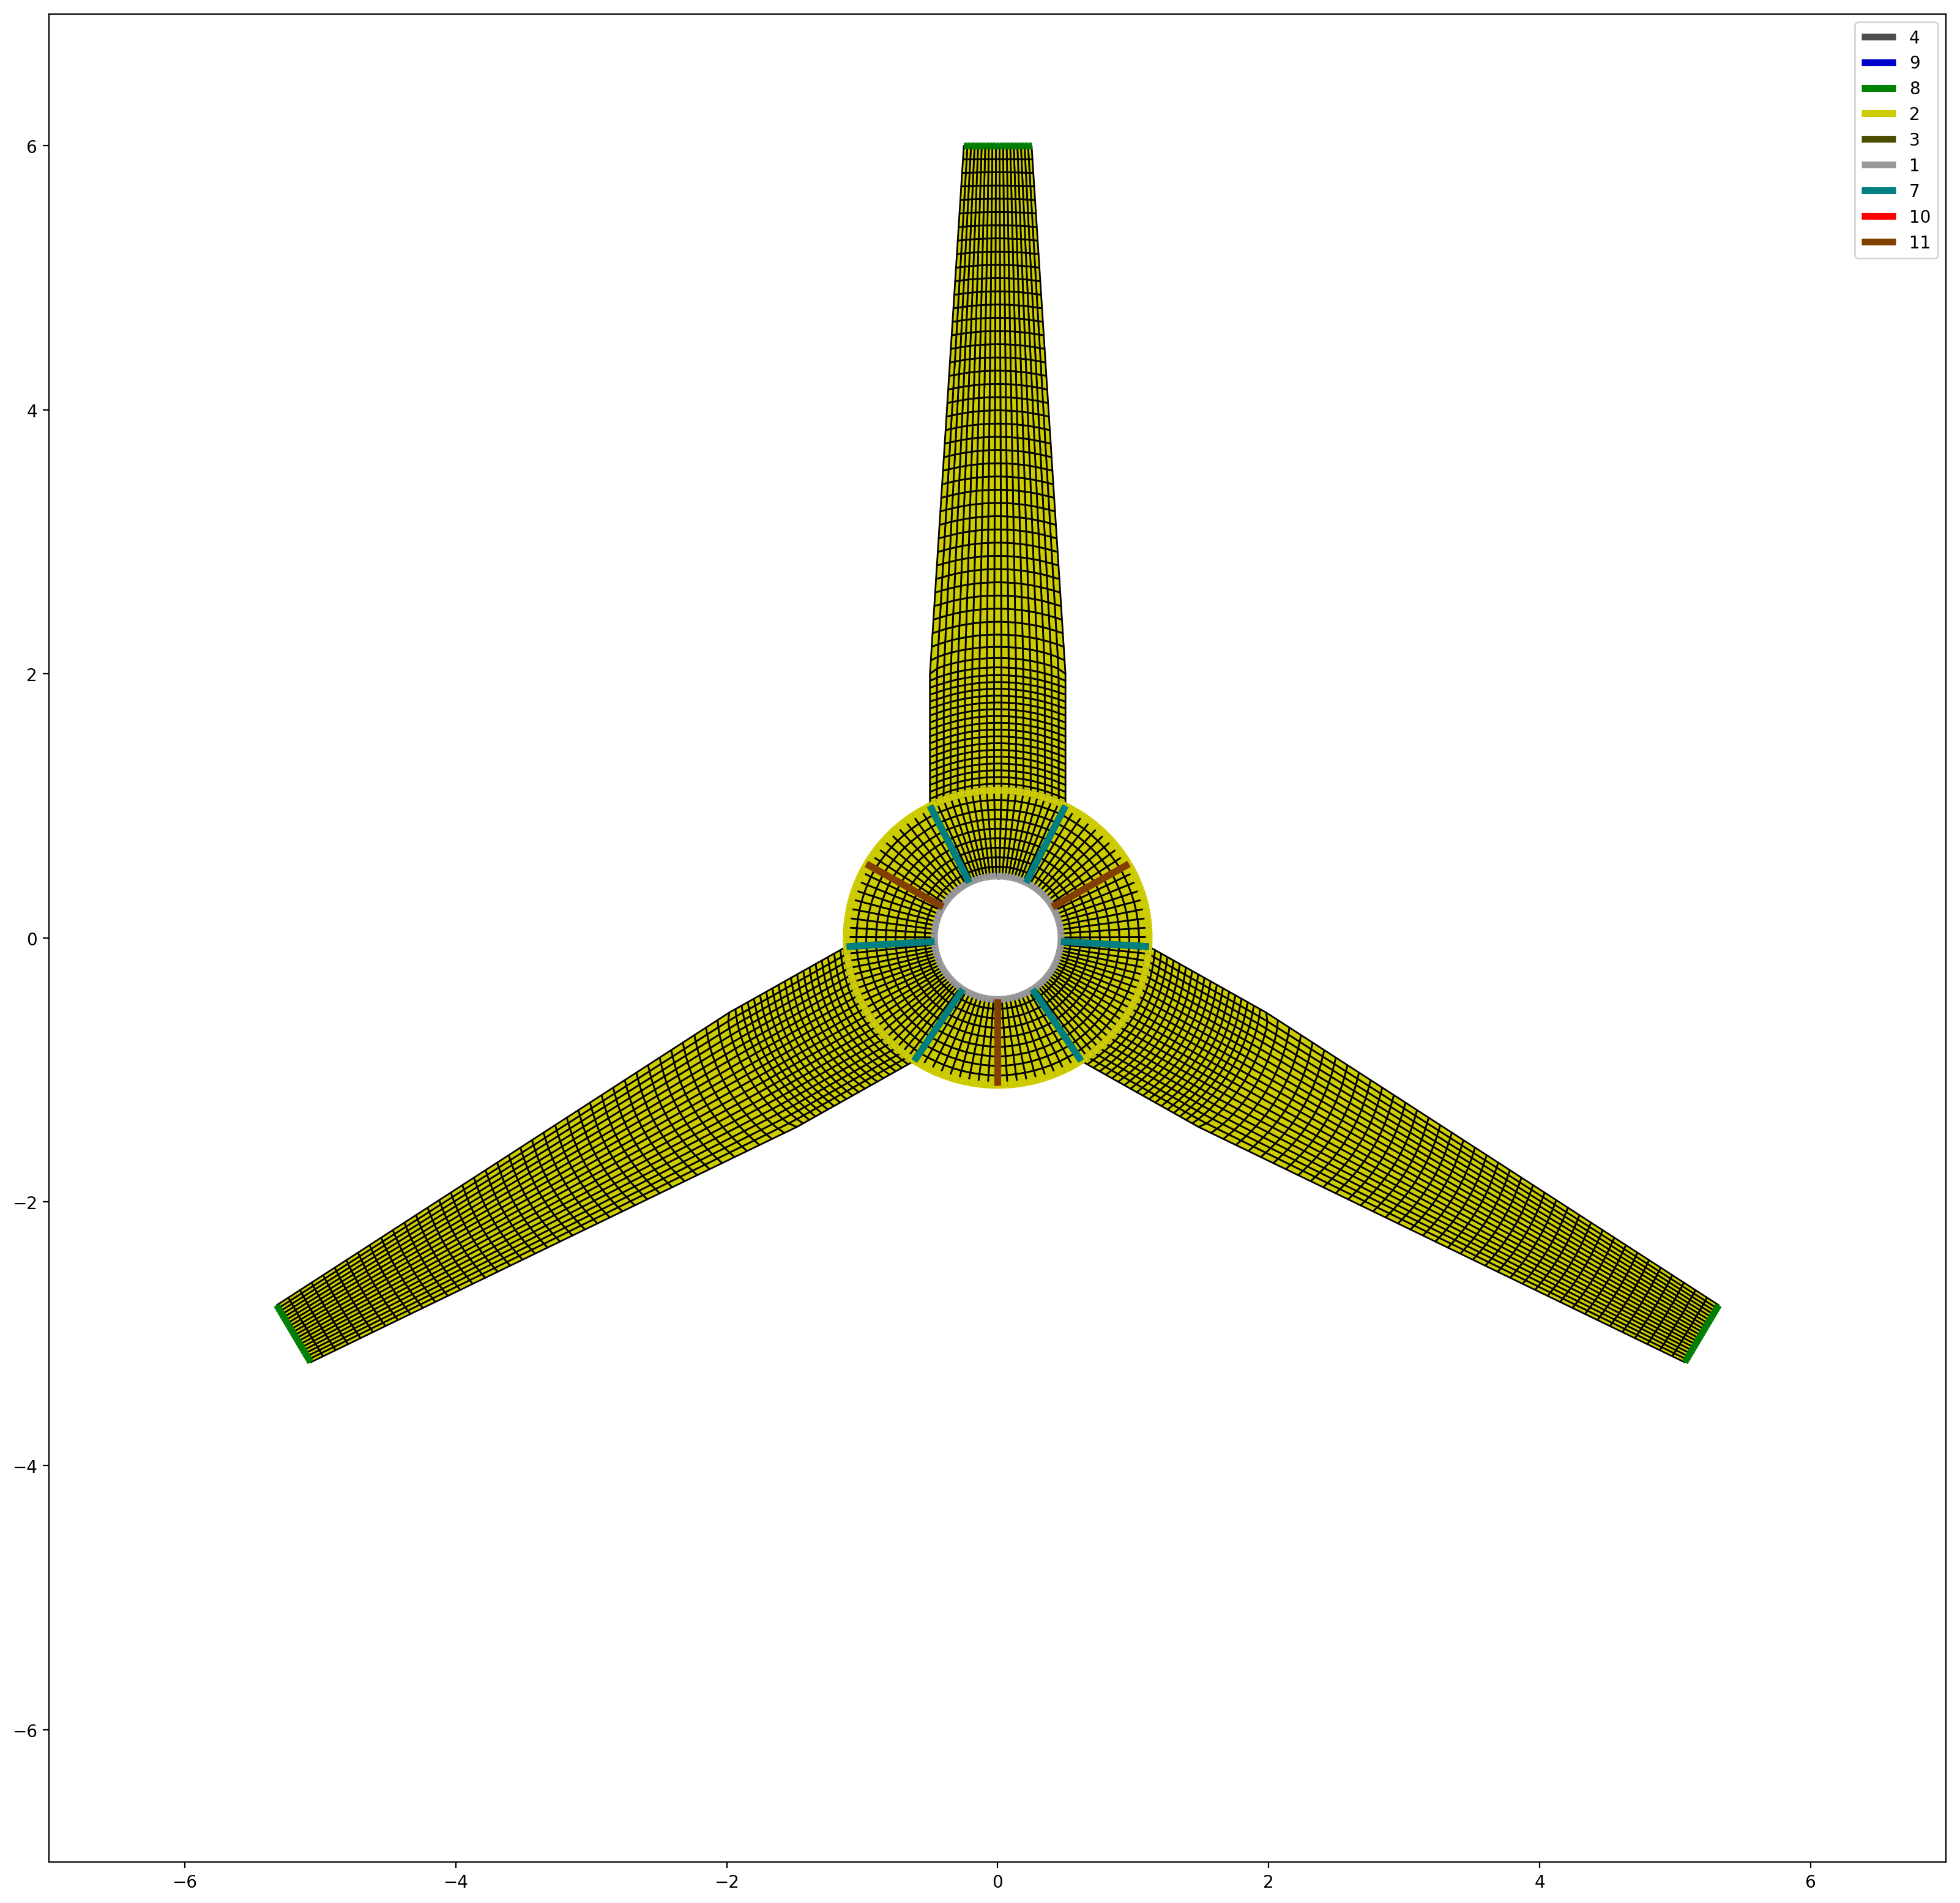

In [4]:
new_mesh = global_system.get_global_mesh()
fig, ax1=plt.subplots(1,figsize=(20, 20), dpi= 200, facecolor='w', edgecolor='k')
amfe.plot_mesh(new_mesh,ax1)
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.show()

In [5]:
# select submesh for interfaces
sub_int1 = global_system.get_submesh(1,10)
sub_int2 = global_system.get_submesh(2,11)
global_system.add_bonded_interface_constraint(sub_int1,sub_int2,tol=5.0e-4)

sub_int3 = global_system.get_submesh(2,10)
sub_int4 = global_system.get_submesh(3,11)
global_system.add_bonded_interface_constraint(sub_int3,sub_int4,tol=5.0e-4)

sub_int5 = global_system.get_submesh(3,10)
sub_int6 = global_system.get_submesh(1,11)
global_system.add_bonded_interface_constraint(sub_int5,sub_int6,tol=5.0e-4)
    
new_mesh = global_system.get_global_mesh()

No handles with labels found to put in legend.


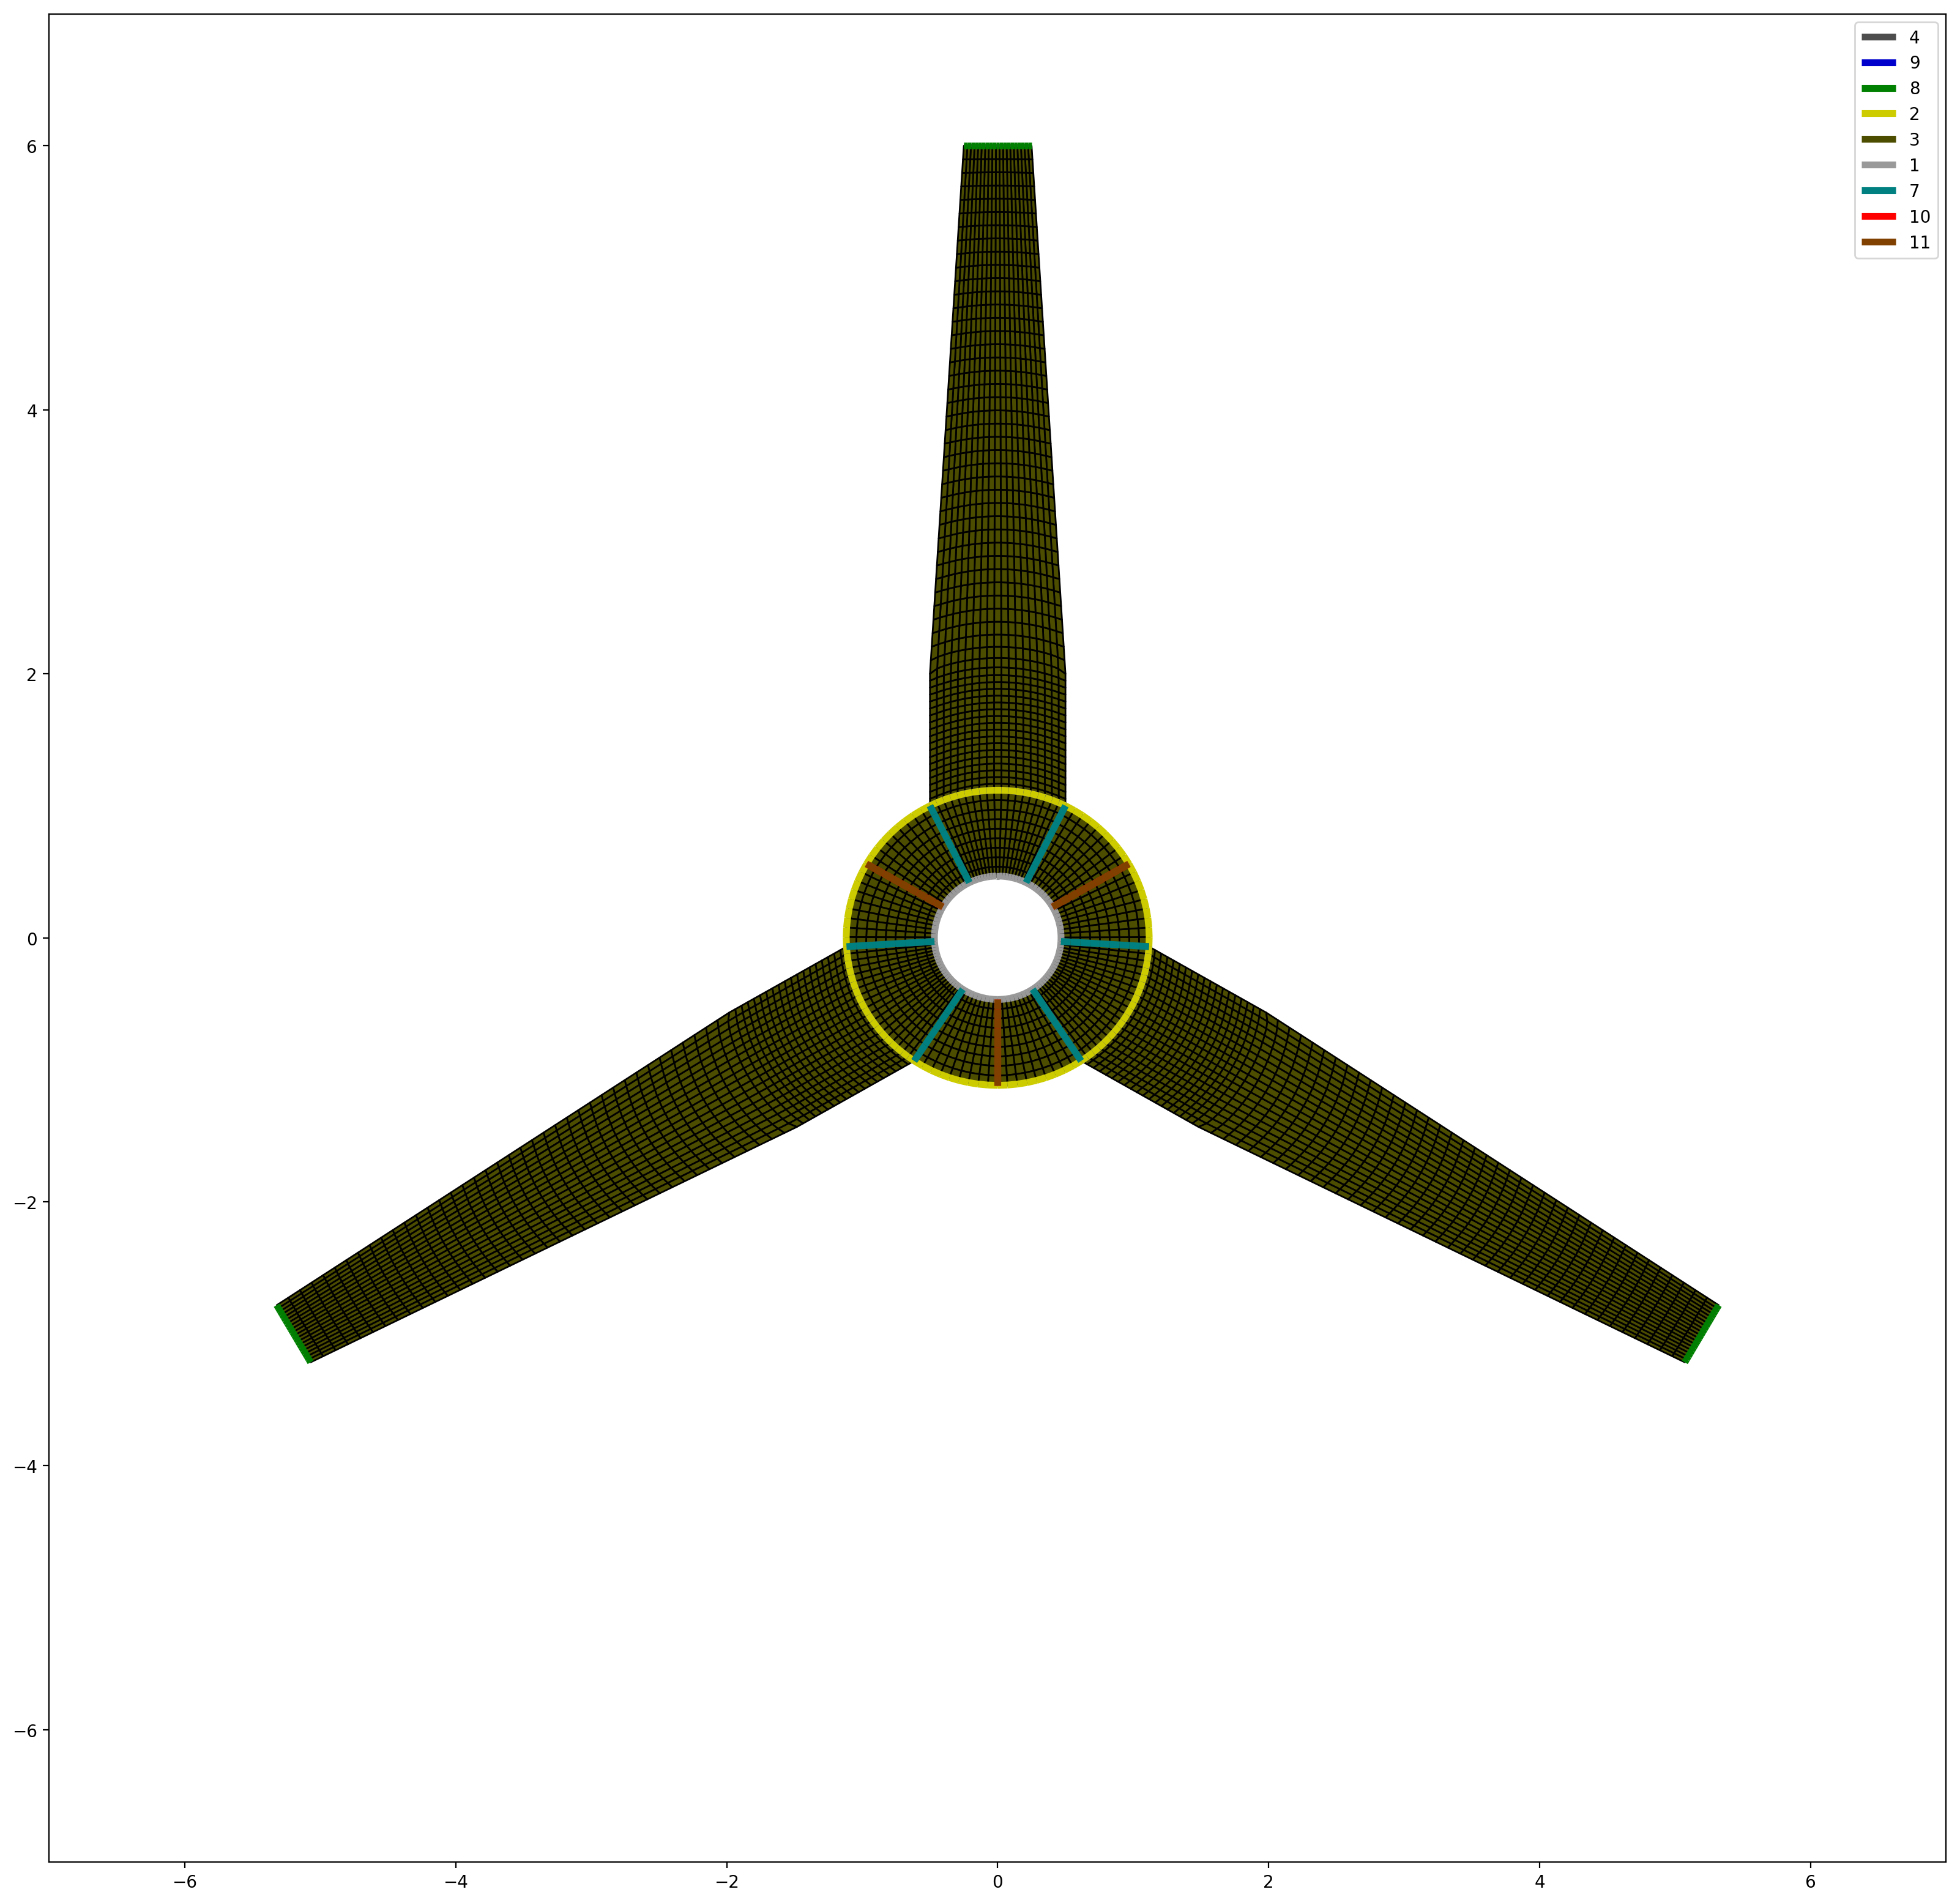

In [6]:
fig, ax1=plt.subplots(1,figsize=(20, 20), dpi= 200, facecolor='w', edgecolor='k')
amfe.plot_mesh(new_mesh,ax1)
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.show()

In [7]:
#creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

value = 1e8
my_comp = amfe.MechanicalSystem()
my_comp.set_mesh_obj(new_mesh)
my_comp.set_domain(6,my_material)
my_comp.apply_dirichlet_boundaries(1, 'xy')
my_comp.apply_neumann_boundaries(8, value, 'normal')
s = amfe.LinearStaticsSolver(my_comp)
s.solve()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_static(scale=1):
    fig, ax1=plt.subplots(1,figsize=(15, 15), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_system_solution(my_comp, factor=scale, ax = ax1)
    plt.xlim([-7,7])
    plt.ylim([-7,7])
    plt.show()
    
interact(plot_static,scale=(0,1000,5))  

*************************************************************

 phys_group 6 with 4305 elements successfully added.
Total number of elements in mesh: 4305
*************************************************************
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 4305 elements and 9180 dofs.
Time taken for preallocation: 0.07 seconds.

 phys_group 1 with 111 nodes successfully added to Dirichlet Boundaries.
Total number of nodes with Dirichlet BCs: 111
Total number of constrained dofs: 222
*************************************************************

 phys_group 8 with 57 elements successfully added to Neumann Boundary.
Total number of neumann elements in mesh: 57
Total number of elements in mesh: 4305
*************************************************************
Attention: No linear solver was given, setting linear_solver = PardisoSolver.
Attention: No pseudo time evaluation was given, setting t = 1.0.
Assembling external force and stiffness...


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\scipy\sparse\sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


Start solving linear static problem...
Static problem solved.


A Jupyter Widget

<function __main__.plot_static>

In [8]:
# select submesh for Neumann B.C
sub_neu1 = global_system.get_submesh(1,8)
sub_neu2 = global_system.get_submesh(2,8)
sub_neu3 = global_system.get_submesh(3,8)

# select submesh for Dirichlet
sub_dir1 = global_system.get_submesh(1,1)
sub_dir2 = global_system.get_submesh(2,1)
sub_dir3 = global_system.get_submesh(3,1)

value = 1.0e8
global_system.apply_neumann_boundaries(sub_neu1,value)
global_system.apply_neumann_boundaries(sub_neu2,value)
global_system.apply_neumann_boundaries(sub_neu3,value)
global_system.apply_dirichlet_boundaries(sub_dir1,0.0,'xy')
global_system.apply_dirichlet_boundaries(sub_dir2,0.0,'xy')
global_system.apply_dirichlet_boundaries(sub_dir3,0.0,'xy')


global_system.update_domain()
domain = global_system
domain.split_in_partitions()

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 8610 elements and 9180 dofs.
Time taken for preallocation: 0.10 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 12915 elements and 9180 dofs.
Time taken for preallocation: 0.15 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 17220 elements and 9180 dofs.
Time taken for preallocation: 0.21 seconds.
Extract interface node from sub_3 and sub_2
Extract interface node from sub_3 and sub_4
Extract interface node from sub_2 and sub_1
Interface nodes from sub_2 and sub_3 already extracted
Interface nodes from sub_1 and sub_2 already extracted
Interface nodes from sub_4 and sub_3 already extracted
Extract interface node from sub_4 and sub_5
Extract interface node from sub_4 and sub_6
Interface nodes from sub_5 and sub_4 already extracted
Extract interface node from sub_5 and sub_12
Extract interface node from sub_6 and sub_17
Interface nodes from 

{1: <amfe.mesh.SubMesh at 0x1cd6f6adc50>,
 2: <amfe.mesh.SubMesh at 0x1cd6d8b5358>,
 3: <amfe.mesh.SubMesh at 0x1cd6f2e6cf8>,
 4: <amfe.mesh.SubMesh at 0x1cd6f5af2e8>,
 5: <amfe.mesh.SubMesh at 0x1cd6f8cd630>,
 6: <amfe.mesh.SubMesh at 0x1cd6f0a3780>,
 7: <amfe.mesh.SubMesh at 0x1cd6f86f780>,
 8: <amfe.mesh.SubMesh at 0x1cd6f2dea58>,
 9: <amfe.mesh.SubMesh at 0x1cd6f59d668>,
 10: <amfe.mesh.SubMesh at 0x1cd6f107588>,
 11: <amfe.mesh.SubMesh at 0x1cd6f6ad080>,
 12: <amfe.mesh.SubMesh at 0x1cd6f088780>,
 13: <amfe.mesh.SubMesh at 0x1cd6f21d048>,
 14: <amfe.mesh.SubMesh at 0x1cd6f5fe160>,
 15: <amfe.mesh.SubMesh at 0x1cd6f86d1d0>,
 16: <amfe.mesh.SubMesh at 0x1cd6f4c0be0>,
 17: <amfe.mesh.SubMesh at 0x1cd6f83f5f8>,
 18: <amfe.mesh.SubMesh at 0x1cd6fdda048>}

In [9]:
super_domain = amfe.SuperDomain(domain.groups)
B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()

BTGT = B.T.dot(G.T)
GB = G.dot(B)

n_dof = super_domain.total_displacement_dofs
n_int = super_domain.total_lambda_dofs
n_null = super_domain.total_alpha_dofs

block_zero_1 = np.zeros([n_null,n_int+n_null])
block_zero_2 = np.zeros([n_int,n_int+n_null])

zero_vector = np.zeros(n_int+n_null)

A1 = np.hstack((Kd,BTGT,B.T))
A2 = np.hstack((GB,block_zero_1))
A3 = np.hstack((B,block_zero_2))


A = np.vstack((A1,A2,A3))
b = np.concatenate((fd,zero_vector))

Ainv = np.linalg.pinv(A)
x = Ainv.dot(b)
#x = np.linalg.solve(A,b)

x = np.linalg.solve(A,b)
u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]


u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]


# print('u = ', u_dual)
# print('lambda = ', lambda_dual)
# print('alpha = ', alpha_dual)

u = super_domain.eval_subdomain_displacement(lambda_dual,alpha_dual)

#print(u)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,scale=(0,1000,5))  

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 367 elements and 814 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 367 elements and 816 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 368 elements and 816 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 171 elements and 400 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 81 elements and 200 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 81 elements and 200 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 367 elements and 814 dofs.
Time taken for pr

C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


A Jupyter Widget

<function __main__.plot_static>

In [10]:
B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()
F, d = super_domain.assemble_F_and_d()

n_null = len(e) # null space size
n_int = len(d) # interface size
Zeros = np.zeros([n_null ,n_null])

A1 = np.hstack((F,G.T))
A2 = np.hstack((G,Zeros))

A = np.vstack((A1,A2))
b = np.concatenate((d,e))

# Dual interface problem
x = np.linalg.solve(A,b)
global_lambda = x[:n_int]
alpha = x[n_int:]

global_alpha = alpha

u = super_domain.eval_subdomain_displacement(global_lambda,alpha)


In [11]:
u

{1: array([ -3.55639410e-04,   8.71824480e-03,  -3.55641638e-04,
          9.04468901e-03,  -3.20003613e-04,   9.08783105e-03,
         -3.20048866e-04,   8.76229721e-03,  -2.83914132e-04,
          9.12771310e-03,  -2.83996269e-04,   8.80304227e-03,
         -2.47307080e-04,   9.16345076e-03,  -2.47412538e-04,
          8.83956460e-03,  -2.10193146e-04,   9.19455042e-03,
         -2.10308115e-04,   8.87135339e-03,  -1.72624905e-04,
          9.22073963e-03,  -1.72736795e-04,   8.89812668e-03,
         -1.34674035e-04,   9.24185253e-03,  -1.34772153e-04,
          8.91971271e-03,  -3.55643210e-04,   9.37681086e-03,
         -3.19956087e-04,   9.41901049e-03,  -2.83828482e-04,
          9.45799927e-03,  -2.47197350e-04,   9.49292485e-03,
         -2.10073639e-04,   9.52331136e-03,  -1.72508656e-04,
          9.54889622e-03,  -1.34572121e-04,   9.56951957e-03,
         -9.63419340e-05,   9.58507341e-03,  -9.64207085e-05,
          9.25777690e-03,  -5.78999563e-05,   9.59548237e-03,
     

In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,scale=(0,1000,5))  

A Jupyter Widget

<function __main__.plot_static>

Extract interface node from sub_3 and sub_2
Extract interface node from sub_3 and sub_4
Extract interface node from sub_2 and sub_1
Interface nodes from sub_2 and sub_3 already extracted
Interface nodes from sub_1 and sub_2 already extracted
Interface nodes from sub_4 and sub_3 already extracted
Extract interface node from sub_4 and sub_5
Extract interface node from sub_4 and sub_6
Interface nodes from sub_5 and sub_4 already extracted
Extract interface node from sub_5 and sub_12
Extract interface node from sub_6 and sub_17
Interface nodes from sub_6 and sub_4 already extracted
Extract interface node from sub_9 and sub_8
Extract interface node from sub_9 and sub_10
Interface nodes from sub_8 and sub_9 already extracted
Extract interface node from sub_8 and sub_7
Interface nodes from sub_7 and sub_8 already extracted
Interface nodes from sub_10 and sub_9 already extracted
Extract interface node from sub_10 and sub_11
Extract interface node from sub_10 and sub_12
Interface nodes from sub

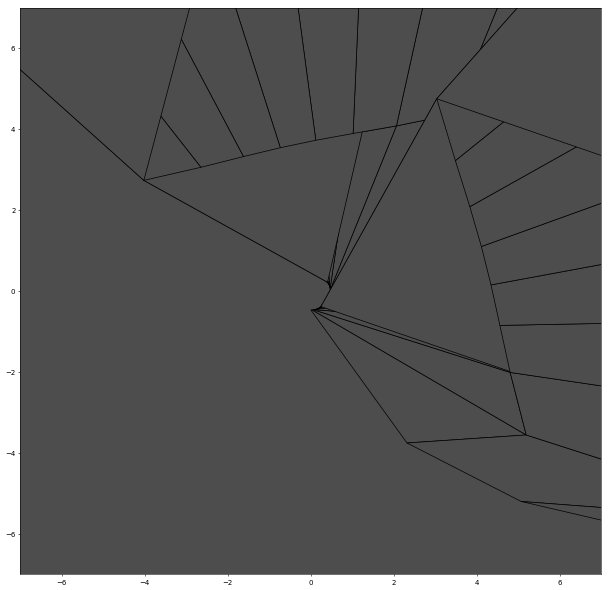

In [15]:
import os
directory = r'H:\TUM-PC\Dokumente\Projects\FETI\temp'
system_path = os.path.join(directory, 'system.aft')
global_system = amfe.load_obj(system_path)

domain = global_system

domain.split_in_partitions()
problem_type = domain.problem_type
num_partitions = len(domain.groups)
partitions_list = np.arange(1,num_partitions+1)
subdomains_dict, sol = amfe.FetiSolver.reading_results(partitions_list, directory  )

displacement = amfe.FetiSolver.average_displacement_calc(global_system,subdomains_dict)
total_dof = global_system.assembly_class.mesh.no_of_dofs
global_system.u_output.append(np.zeros(total_dof))
global_system.u_output.append(displacement)




In [19]:
def plot_static(scale=1):
    fig, ax1=plt.subplots(1,figsize=(15, 15), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_system_solution(global_system, factor=scale*0.000001, ax = ax1)
    plt.xlim([-7,7])
    plt.ylim([-7,7])
    plt.show()
    
interact(plot_static, scale=(0,1,0.1))

A Jupyter Widget

<function __main__.plot_static>